<a href="https://colab.research.google.com/github/peterlhn/Google-Colab/blob/master/Random_Forest_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classification Model**

**Importing Required Libraries**

[Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

In [1]:
import pandas as pd
# Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

**Loading Data**


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://storage.googleapis.com/ppp-personal-project/Machine-Learning-Dataset-and-Code/Others/diabetes.csv", header=0, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables 
* Dependent(or target variable)  
* Independent variable(or feature variables) <- **CLASS**

In [4]:
#Split dataset in features and target variable

# Features (independent variable)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]    

# Target (dependent variable)
y = pima.label            

In [5]:
print("--------Features----------------")
print(X.head(3))

print("--------Target------------------")
print(y.head(3))

--------Features----------------
   pregnant  insulin   bmi  age  glucose  bp  pedigree
0         6        0  33.6   50      148  72     0.627
1         1        0  26.6   31       85  66     0.351
2         8        0  23.3   32      183  64     0.672
--------Target------------------
0    1
1    0
2    1
Name: label, dtype: int64


**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)  

**Building Decision Tree Model**

RandomForestClassifier(bootstrap=True, class_weight=None, ...

* criterion='gini'
* max_depth=None
* max_features='auto'
* n_estimators = 100
* max_leaf_nodes=None,


In [15]:
from sklearn import model_selection


# Create a random forest model classifer object
rfc = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=3)

# Train Decision Tree Classifer
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)


In [16]:
# Check the accuracy using actual and predicted values.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7559055118110236


**Visulaize the tree**

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Extract One of the many tree from the random forest (KEY)
estimator = rfc.estimators_[5]

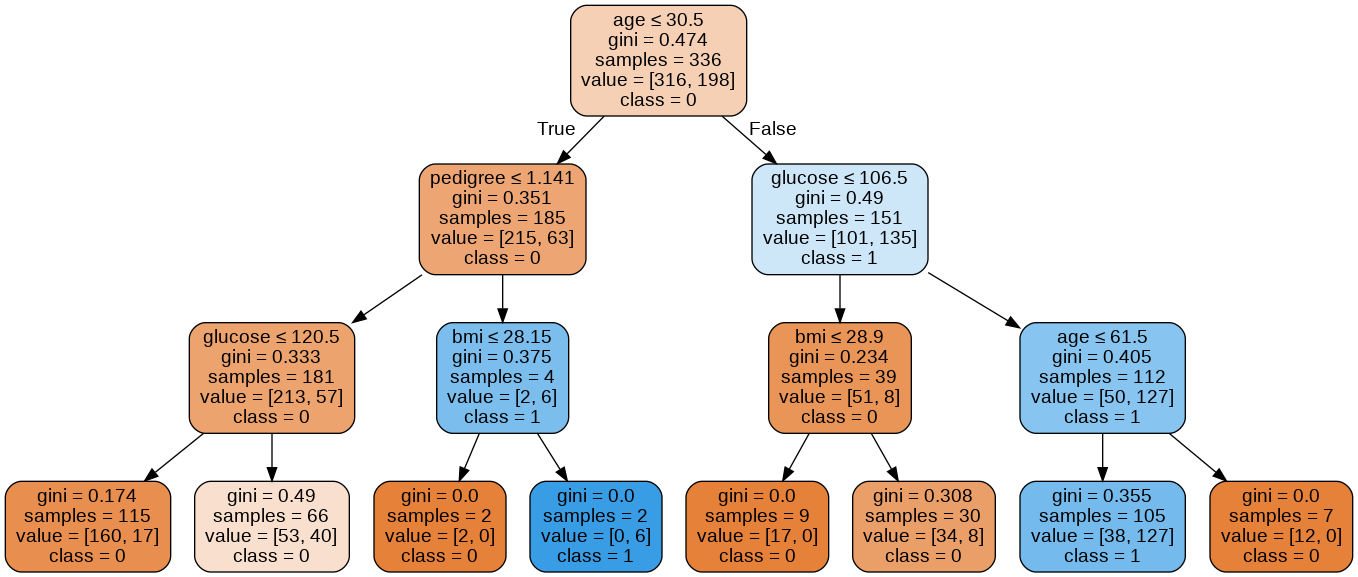

In [18]:
# Create a Tem environment to input data as string
dot_data = StringIO()

# Export a decision tree in DOT format.
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

# Create graph object, tranform it from DOT to graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Trun graph object to readable graphic format (PNG)
graph.write_png('diabetes.png')

# Show the graphic PNG
Image(graph.create_png())

#**Iris Sample**

**Load Iris Sample Data**

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()


**Create a model train and extract:** we could use a single decision tree, but since I often employ the random forest for modeling it’s used in this example. (The trees will be slightly different from one another!).

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

**Convert dot to png using a system command:** running system commands in Python can be handy for carrying out simple tasks. This requires installation of graphviz which includes the dot utility. For the complete options for conversion, take a look at the documentation.

In [13]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

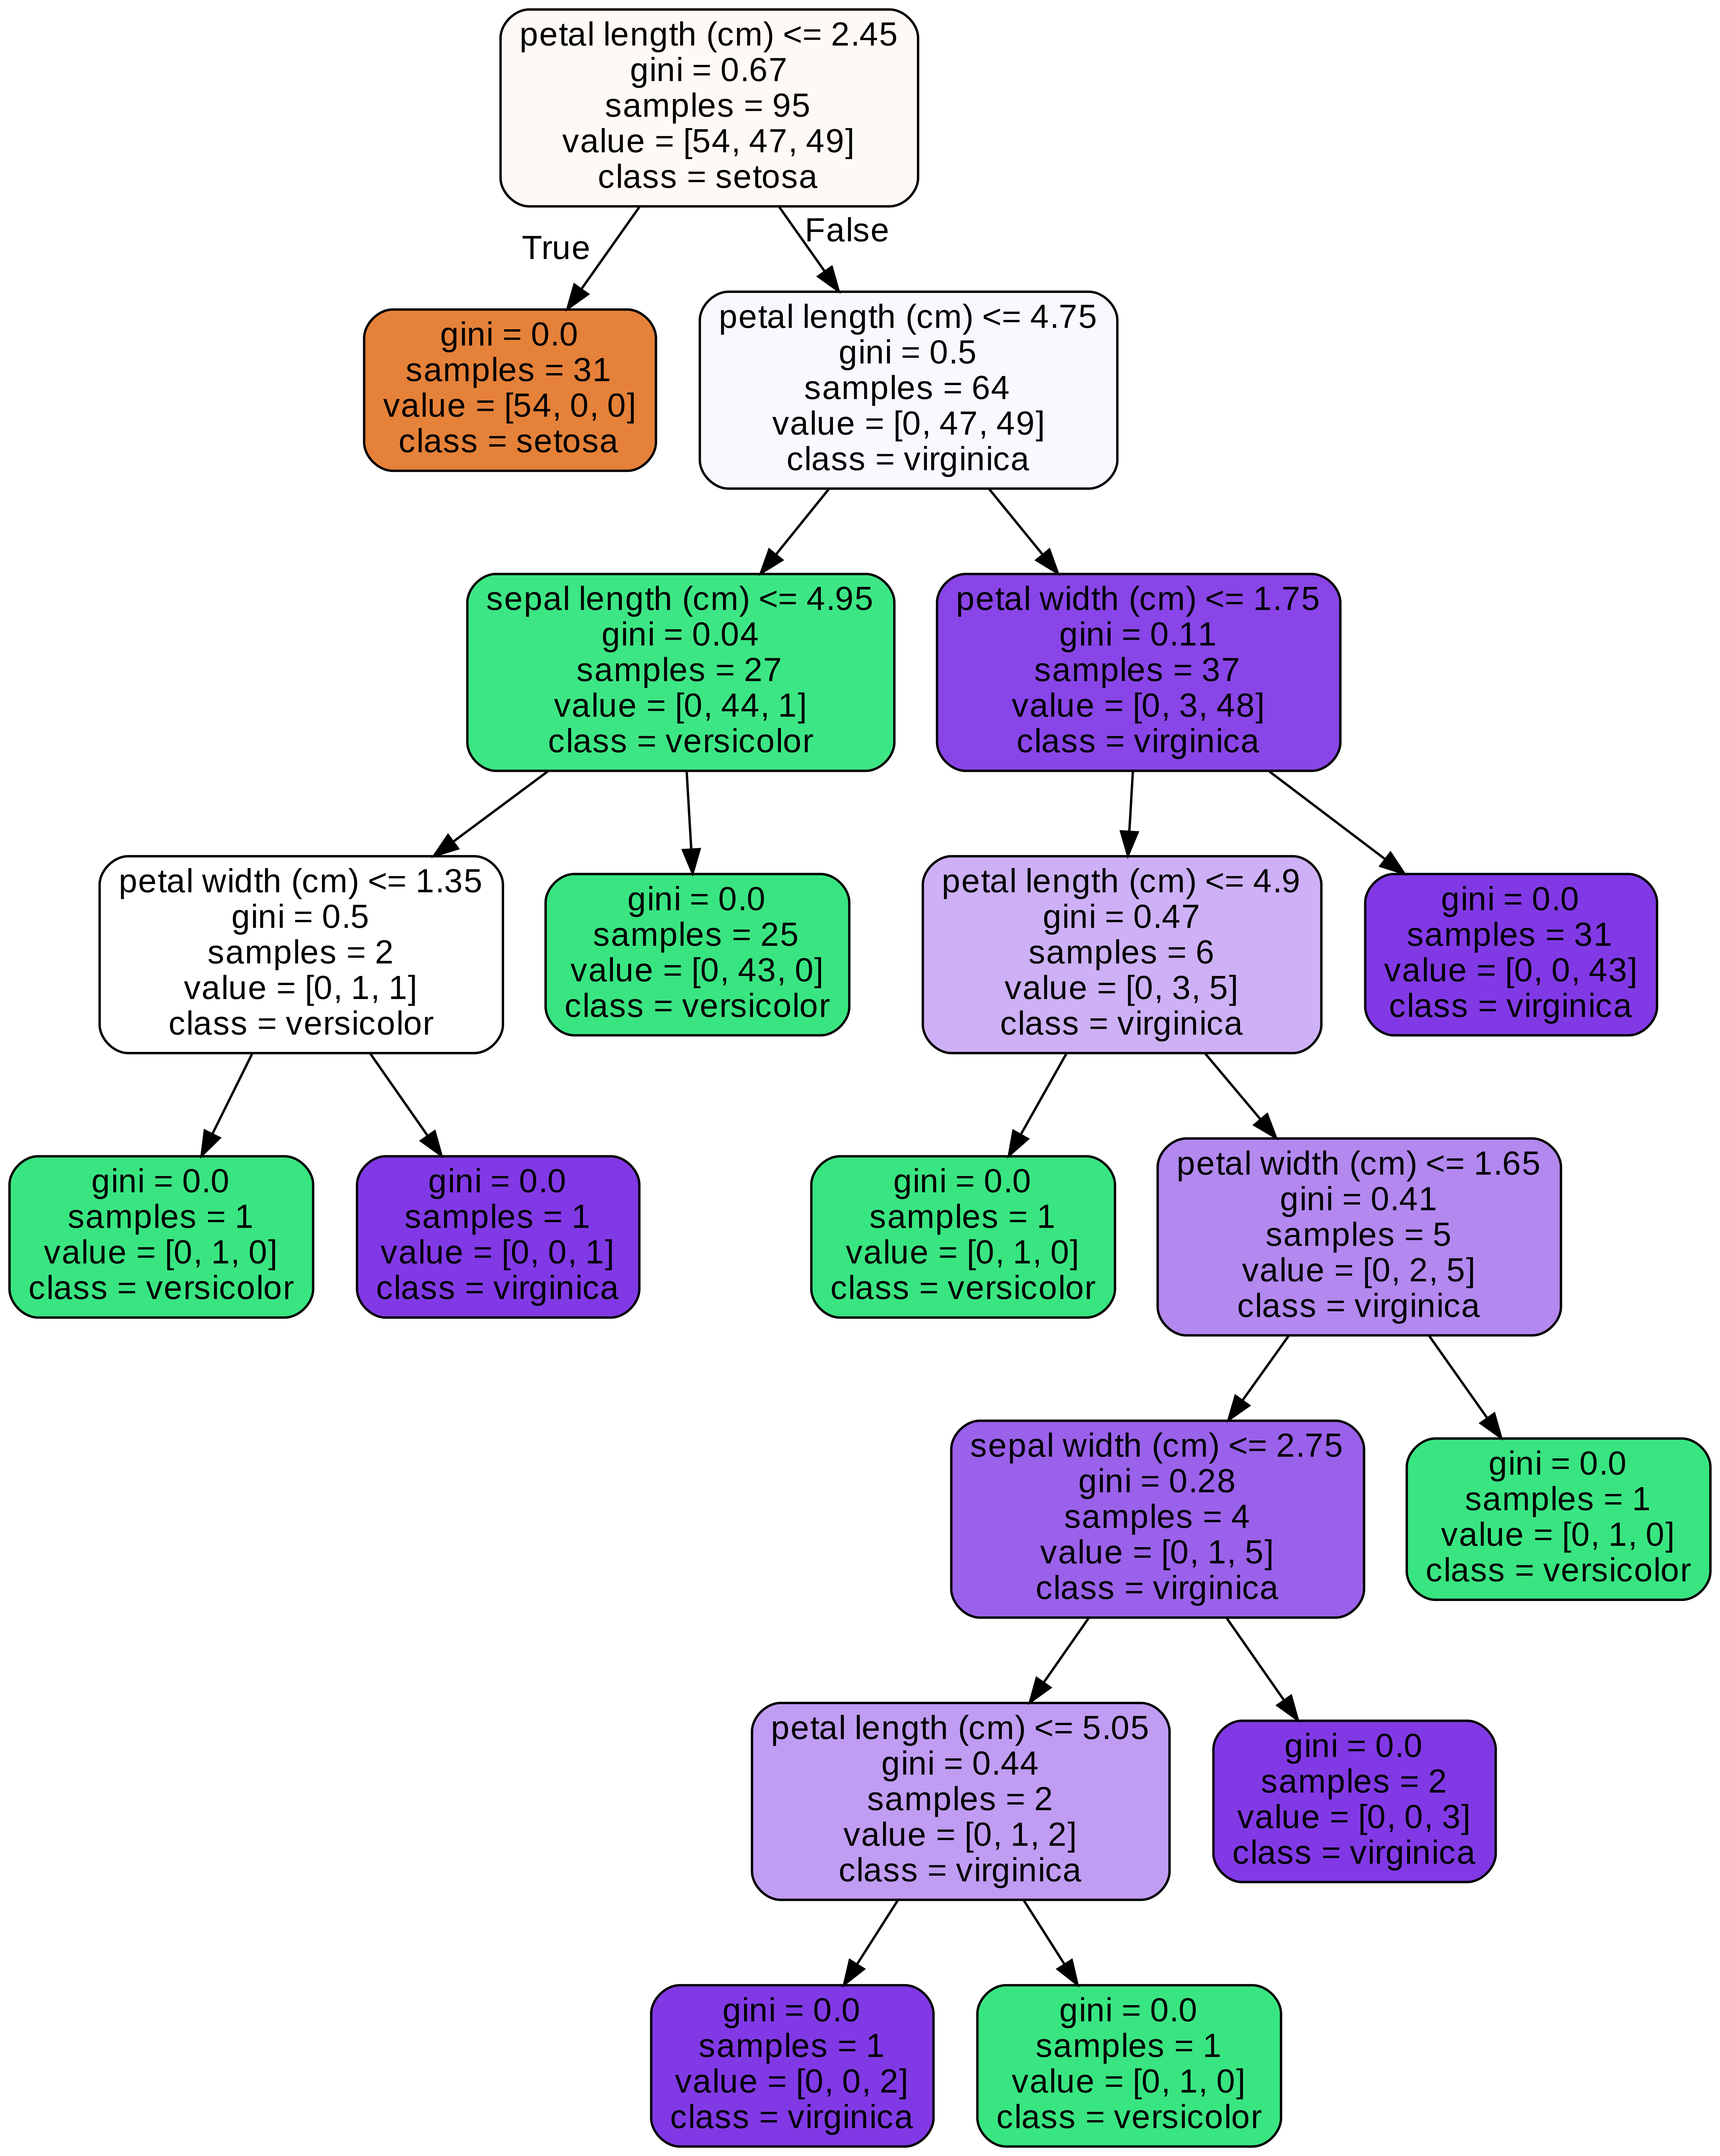

In [14]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')